In [1]:
import warnings  
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
from ydata_profiling import ProfileReport

pd.options.display.float_format = '{:.2f}'.format
sns.set(color_codes=True)
sns.set_style('darkgrid')
%matplotlib inline 

In [2]:
df = pd.read_csv('fortune500.csv')

In [3]:
# pip install ydata-profiling

In [4]:
# !pip install missingno

In [5]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Prepraration

In [6]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.50,806
1,1955,2,Exxon Mobil,5661.40,584.8
2,1955,3,U.S. Steel,3250.40,195.4
3,1955,4,General Electric,2959.10,212.6
4,1955,5,Esmark,2510.80,19.1


In [7]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.60,493
25496,2005,497,Peabody Energy,3631.60,175.4
25497,2005,498,Wendy's International,3630.40,57.8
25498,2005,499,Kindred Healthcare,3616.60,70.6
25499,2005,500,Cincinnati Financial,3614.00,584


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25500 non-null  int64  
 1   Rank                   25500 non-null  int64  
 2   Company                25500 non-null  object 
 3   Revenue (in millions)  25500 non-null  float64
 4   Profit (in millions)   25500 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 996.2+ KB


There are no missing values. 



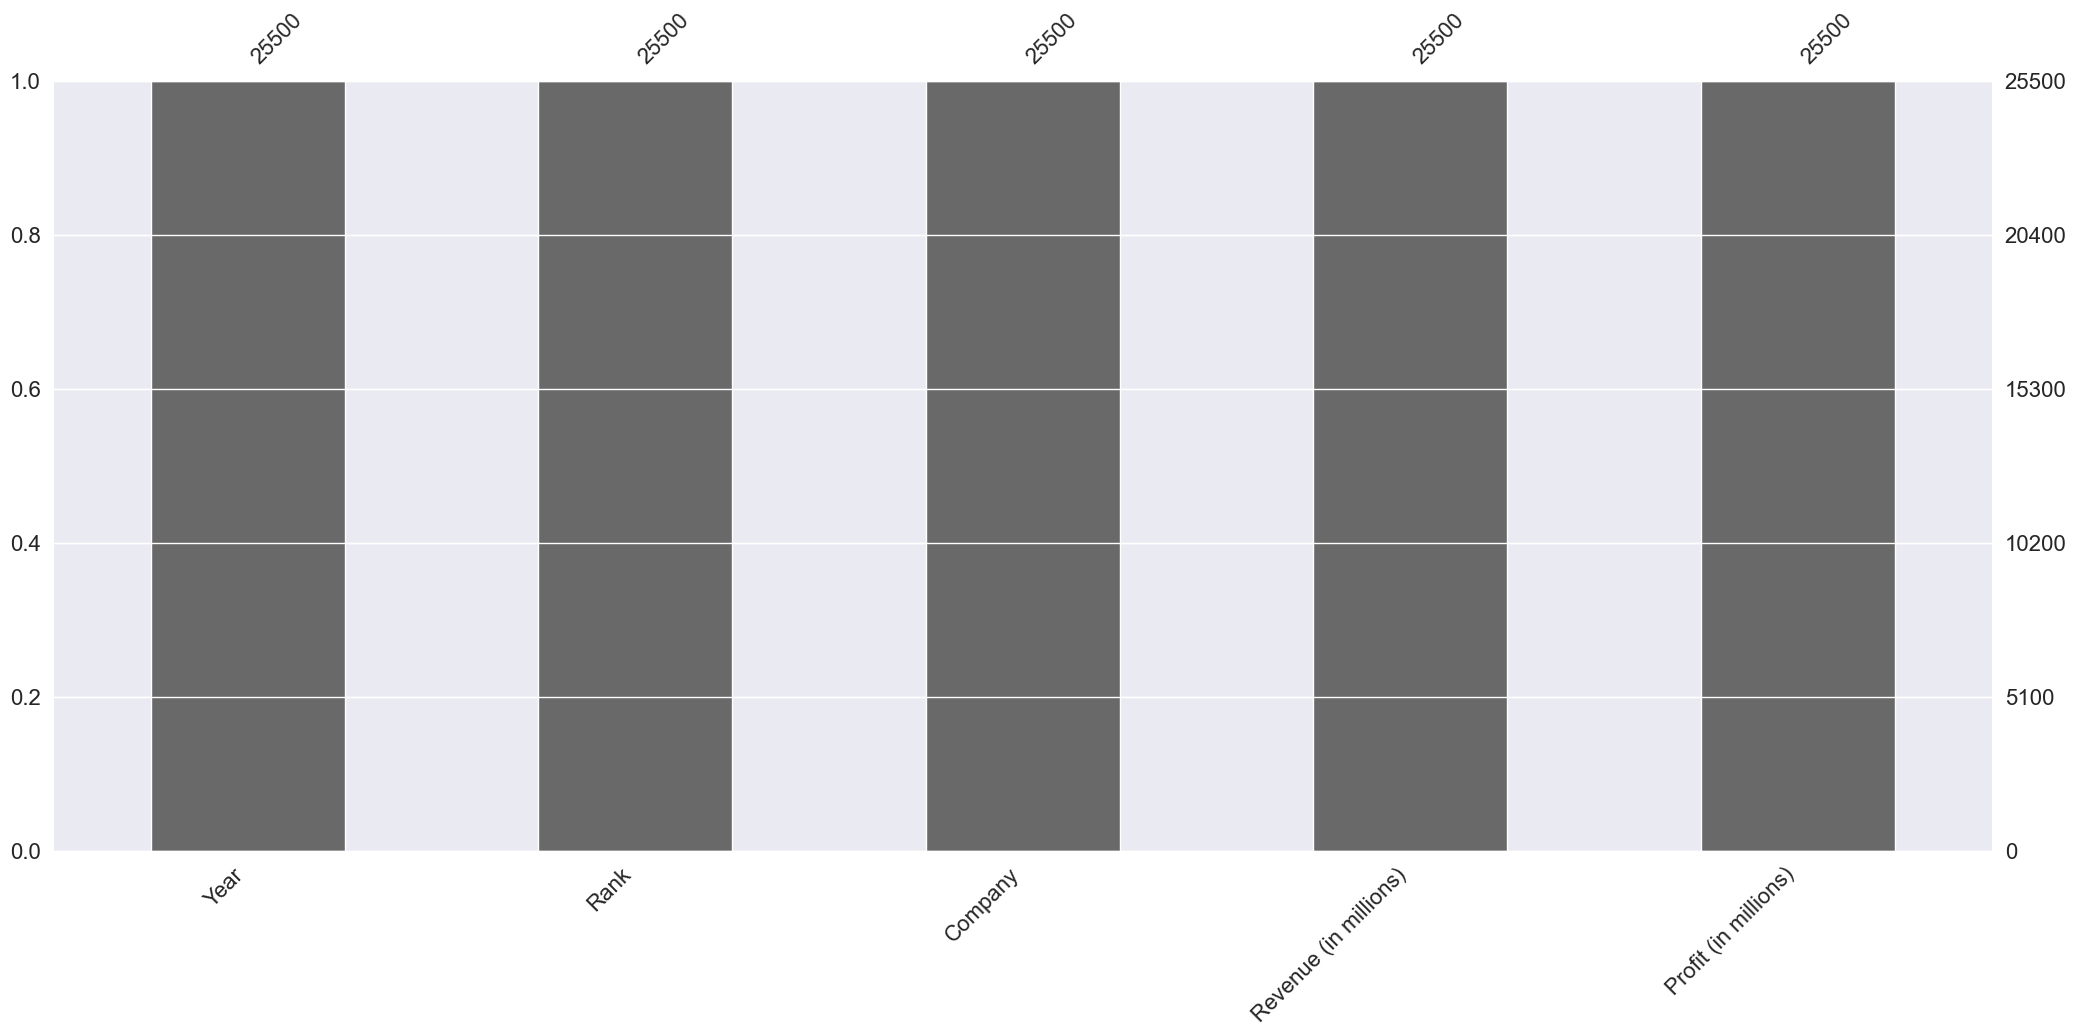

In [9]:
# Checking for missing values

ax = msno.bar(df)

print('There are no missing values.','\n')

In [10]:
df.describe()

,Year,Rank,Revenue (in millions)
count,25500.00,25500.00,25500.00
mean,1980.00,250.50,4273.33
std,14.72,144.34,11351.88
min,1955.00,1.00,49.70
25%,1967.00,125.75,362.30
50%,1980.00,250.50,1019.00
75%,1993.00,375.25,3871.00
max,2005.00,500.00,288189.00


In [11]:
print('Total number of observations:', df.shape[0])
print('Total number of attributes:', df.shape[1])

Total number of observations: 25500
Total number of attributes: 5


In [12]:
print('Columns:\n\n',df.columns)

Columns:

 Index(['Year', 'Rank', 'Company', 'Revenue (in millions)',
       'Profit (in millions)'],
      dtype='object')


## Exploratory Data Analysis

In [13]:
unique_company = df['Company'].unique()
count_unique_compnay = len(unique_company)

print(f'Unique occurrences of companies: {count_unique_compnay}','\n')
print(unique_company)

Unique occurrences of companies: 1887 

['General Motors' 'Exxon Mobil' 'U.S. Steel' ... 'Peabody Energy'
 "Wendy's International" 'Cincinnati Financial']


# Top 5 Companies by Revenue for each Decade

In [14]:
# https://towardsdatascience.com/how-to-group-yearly-data-by-periods-5199a1dba5db
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.IntervalIndex.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

# https://saturncloud.io/blog/how-to-group-a-pandas-dataframe-by-decade/

In [15]:
df['Year'].unique()

array([1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005], dtype=int64)

In [16]:
years = df[['Year', 'Revenue (in millions)']]
years

,Year,Revenue (in millions)
0,1955,9823.50
1,1955,5661.40
2,1955,3250.40
3,1955,2959.10
4,1955,2510.80
...,...,...
25495,2005,3648.60
25496,2005,3631.60
25497,2005,3630.40
25498,2005,3616.60


In [17]:
# By decade (10)
period_length = 10

# Specify range of years
start_year = 1950
end_year = 2009

# Create subset for decades between 1950-2009
decades = df[(df['Year'] >= 1950) & (df['Year'] <= 2009)]

In [18]:
year_range = end_year - start_year
modulo = year_range % period_length

print('For 1950–2009 the modulo is:',modulo)

For 1950–2009 the modulo is: 9


In [19]:
# let’s find the starting and ending years for our last period

if modulo == 0:
    final_start = end_year - period_length
else:
    final_start = end_year - modulo
final_end = end_year + 1 # The addition of one is done to include the last year as well.

In [20]:
# Create a list of all the earlier starting years for the year range.
starts = np.arange(start_year, final_start, period_length).tolist()

In [21]:
# Create lists of tuples
tuples = [(start, start + period_length) for start in starts]

# Add the last period calculated earlier
tuples.append(tuple([final_start, final_end]))

# Create our bins 
bins = pd.IntervalIndex.from_tuples(tuples, closed='left')

print('Invervals:\n\n',bins)
print('\nTuples:')
tuples

Invervals:

 IntervalIndex([[1950, 1960), [1960, 1970), [1970, 1980), [1980, 1990), [1990, 2000), [2000, 2010)], dtype='interval[int64, left]')

Tuples:


[(1950, 1960),
 (1960, 1970),
 (1970, 1980),
 (1980, 1990),
 (1990, 2000),
 (2000, 2010)]

In [22]:
# Convert bins to strings
original_labels = list(bins.astype(str))

new_labels = ['{} - {}'.format(b.strip('[)').split(', ')[0], int(b.strip('[)').split(', ')[1])-1)
              for b in original_labels]

label_dict = dict(zip(original_labels, new_labels))

label_dict

{'[1950, 1960)': '1950 - 1959',
 '[1960, 1970)': '1960 - 1969',
 '[1970, 1980)': '1970 - 1979',
 '[1980, 1990)': '1980 - 1989',
 '[1990, 2000)': '1990 - 1999',
 '[2000, 2010)': '2000 - 2009'}

In [23]:
# Assign each row to a decade
df['Decade'] = pd.cut(df['Year'], bins=bins, include_lowest=True, precision=0)
df['Decade'] = df['Decade'].astype("str")
df = df.replace(label_dict)

df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions),Decade
0,1955,1,General Motors,9823.50,806,1950 - 1959
1,1955,2,Exxon Mobil,5661.40,584.8,1950 - 1959
2,1955,3,U.S. Steel,3250.40,195.4,1950 - 1959
3,1955,4,General Electric,2959.10,212.6,1950 - 1959
4,1955,5,Esmark,2510.80,19.1,1950 - 1959


In [24]:
# Grouped Companies by Decades and Revenue

columns = ['Decade', 'Company']

grouped_revenue = df.groupby(columns)['Revenue (in millions)'].sum().reset_index()

grouped_revenue.head()

,Decade,Company,Revenue (in millions)
0,1950 - 1959,3M,1590.00
1,1950 - 1959,A.O. Smith,1243.20
2,1950 - 1959,ACF Industries,1271.00
3,1950 - 1959,AM International,450.60
4,1950 - 1959,AMAX,2948.50


In [25]:
# Top 5 companies by revenue per Decade

top5_revenue_per_decade = grouped_revenue.groupby(
    ['Decade','Company','Revenue (in millions)']).sum().sort_values(by=['Decade','Revenue (in millions)'],
                                                                ascending=False).groupby('Decade').head().reset_index()
top5_revenue_per_decade

,Decade,Company,Revenue (in millions)
0,2000 - 2009,Wal-Mart Stores,1373311.00
1,2000 - 2009,Exxon Mobil,1232291.00
2,2000 - 2009,General Motors,1126875.20
3,2000 - 2009,Ford Motor,1005927.00
4,2000 - 2009,General Electric,785644.00
5,1990 - 1999,General Motors,1473915.00
6,1990 - 1999,Ford Motor,1204086.70
7,1990 - 1999,Exxon Mobil,1051133.00
8,1990 - 1999,General Electric,702142.00
9,1990 - 1999,Intl. Business Machines,697776.00


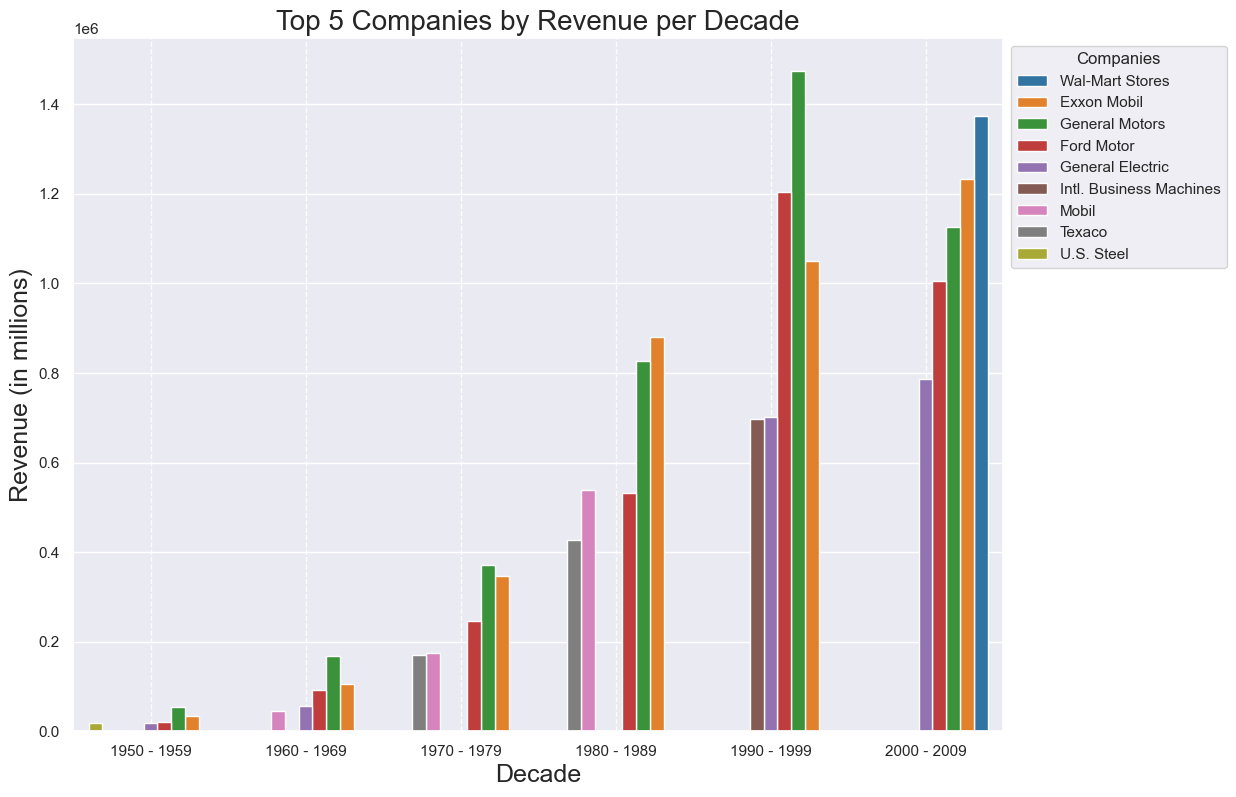

In [26]:
# bar chart

# https://stackoverflow.com/questions/34232073/seaborn-heatmap-y-axis-reverse-order
# https://seaborn.pydata.org/generated/seaborn.barplot.html

plt.figure(figsize=(12, 9))

ax = sns.barplot(data=top5_revenue_per_decade, x='Decade', y='Revenue (in millions)',
            hue='Company', palette='tab10')

plt.title('Top 5 Companies by Revenue per Decade',fontsize=20)
plt.xlabel('Decade',fontsize=18)
plt.ylabel('Revenue (in millions)',fontsize=18)

plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.legend(title='Companies', loc='upper left', bbox_to_anchor=(1, 1))

ax.invert_xaxis()

plt.show()

## Top 20 Companies by Revenue in 1971

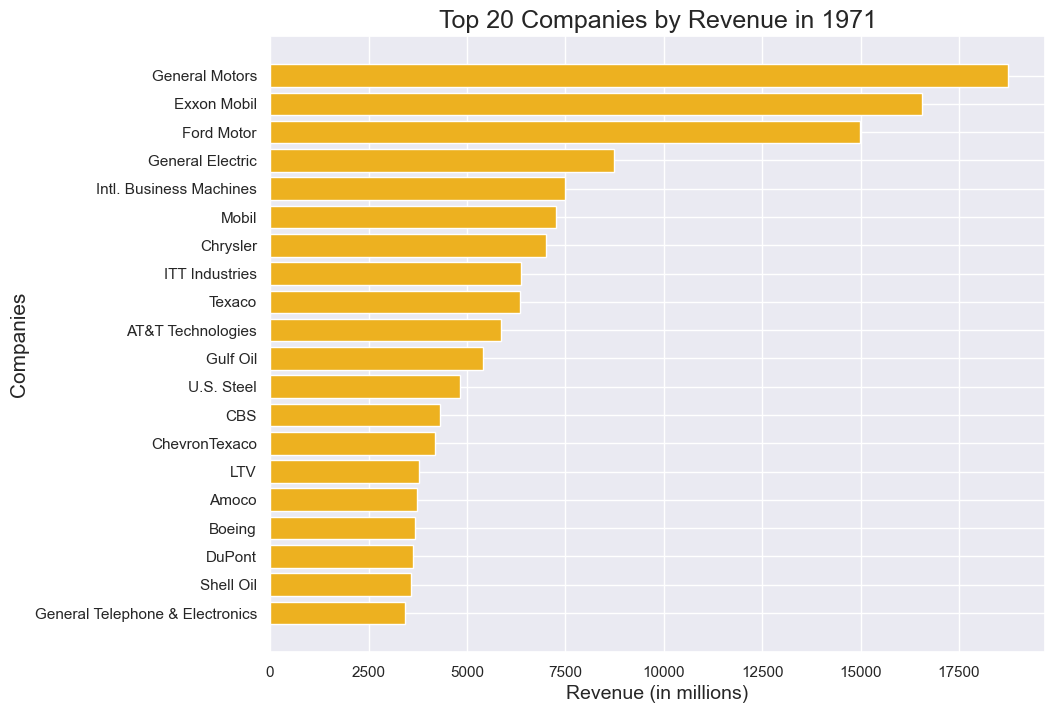

In [27]:
# Horizontal Bar Plot

# https://pandas.pydata.org/pandas-docs/version/0.23.0/generated/pandas.DataFrame.nlargest.html
#https://datatofish.com/horizontal-bar-chart-matplotlib/
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
# https://www.mathworks.com/help/matlab/creating_plots/specify-plot-colors.html
# https://seaborn.pydata.org/examples/part_whole_bars.html

top20_companies1971 = df[df['Year'] == 1971].nlargest(20, 'Revenue (in millions)')

companies = top20_companies1971['Company']
revenue = top20_companies1971['Revenue (in millions)']

plt.figure(figsize=(10, 8))
plt.barh(companies, revenue, color='#EDB120')

# The y-axis labels read top-to-bottom
plt.gca().invert_yaxis()  

plt.title('Top 20 Companies by Revenue in 1971',fontsize=18)
plt.xlabel('Revenue (in millions)',fontsize=14)
plt.ylabel('Companies',fontsize= 15)

plt.show()

In [28]:
# Revenue Figures for the Top 20 Companies in 1971

relevant_columns = ['Year', 'Rank', 'Company', 'Revenue (in millions)']

top20_1971 = df[df['Year'] == 1971][relevant_columns].nlargest(20, 'Revenue (in millions)')
top20_1971

,Year,Rank,Company,Revenue (in millions)
8000,1971,1,General Motors,18752.40
8001,1971,2,Exxon Mobil,16554.20
8002,1971,3,Ford Motor,14979.90
8003,1971,4,General Electric,8726.70
8004,1971,5,Intl. Business Machines,7504.00
8005,1971,6,Mobil,7260.50
8006,1971,7,Chrysler,6999.70
8007,1971,8,ITT Industries,6364.50
8008,1971,9,Texaco,6349.80
8009,1971,10,AT&T Technologies,5856.20


# Top 10 Company's profit increased the most between 1990-1999

In [29]:
# https://www.geeksforgeeks.org/python-string-replace/
# https://www.w3schools.com/python/pandas/ref_df_astype.asp

In [30]:
# Replace 'N.A.' with 0 in 'Profit' column.

df['Profit (in millions)'] = df['Profit (in millions)'].replace('N.A.', 0)

In [31]:
# Convert Dtype from 'object' to 'float' to ensure the plot can be visualised

df['Profit (in millions)'] = df['Profit (in millions)'].astype(float)
df['Profit (in millions)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25500 entries, 0 to 25499
Series name: Profit (in millions)
Non-Null Count  Dtype  
--------------  -----  
25500 non-null  float64
dtypes: float64(1)
memory usage: 199.3 KB


In [32]:
# Profit figures by Decade

profit_by_decades = df.groupby('Decade')['Profit (in millions)'].sum().reset_index()
profit_by_decades

,Decade,Profit (in millions)
0,1950 - 1959,52236.10
1,1960 - 1969,168466.60
2,1970 - 1979,381275.80
3,1980 - 1989,799231.60
4,1990 - 1999,1735348.30
5,2000 - 2009,2088268.90


In [33]:
# Top 10 Profit figures by Company between 1990 and 1999

decade_90 = df[df['Decade'] == '1990 - 1999']

top10_decade_90 = decade_90.groupby('Company')['Profit (in millions)'].sum().sort_values(
    ascending=False).reset_index().head(10)

top10_decade_90

,Company,Profit (in millions)
0,Exxon Mobil,58080.00
1,General Electric,55996.00
2,Altria Group,45682.00
3,Ford Motor,40465.10
4,Merck,29624.50
5,Intel,29245.40
6,Coca-Cola,23865.70
7,AT&T,21759.00
8,Bristol-Myers Squibb,21321.90
9,Mobil,21240.00


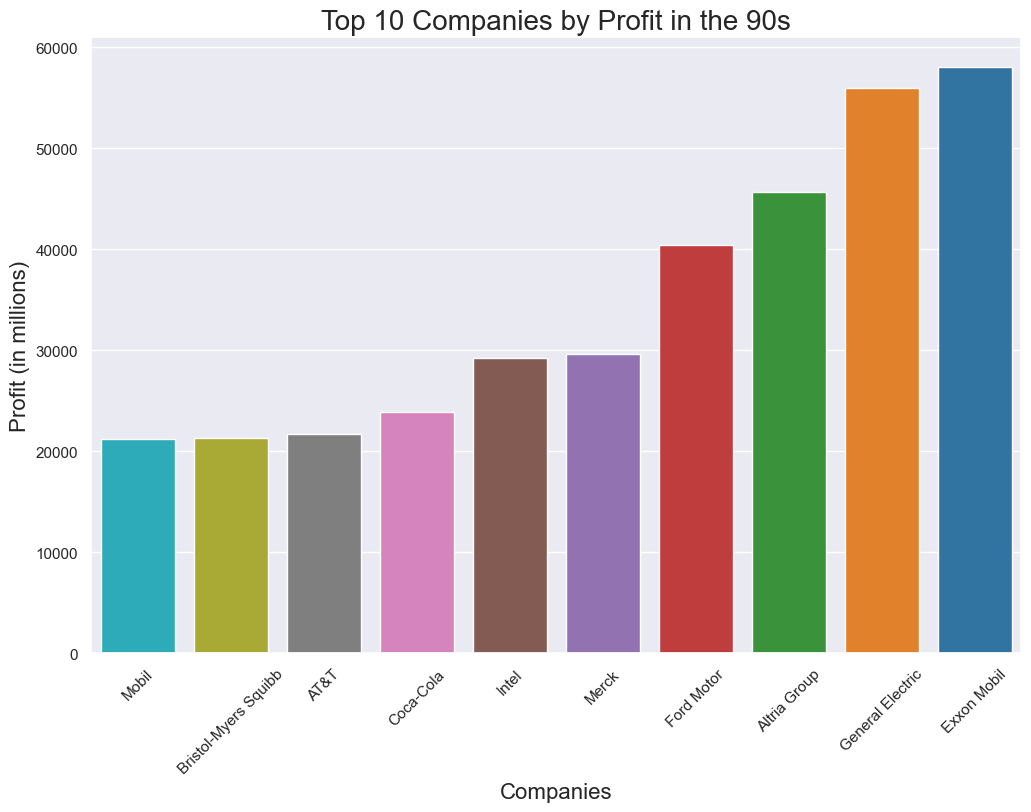

In [37]:
# https://r02b.github.io/seaborn_palettes/
# https://www.geeksforgeeks.org/how-to-place-legend-outside-of-the-plot-in-matplotlib/

# https://seaborn.pydata.org/examples/wide_data_lineplot.html
# https://stackabuse.com/matplotlib-line-plot-tutorial-and-examples/
# https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python
# https://www.geeksforgeeks.org/how-to-place-legend-outside-of-the-plot-in-matplotlib/
# https://r02b.github.io/seaborn_palettes/

plt.figure(figsize=(12, 8))

ax = sns.barplot(data=top10_decade_90,x='Company', y='Profit (in millions)',
            palette='tab10')

plt.title('Top 10 Companies by Profit in the 90s',fontsize=20)
plt.xlabel('Companies',fontsize=16)
plt.ylabel('Profit (in millions)',fontsize=16)
plt.xticks(rotation=45)

ax.invert_xaxis()

plt.show()

# Average Revenue By Decade

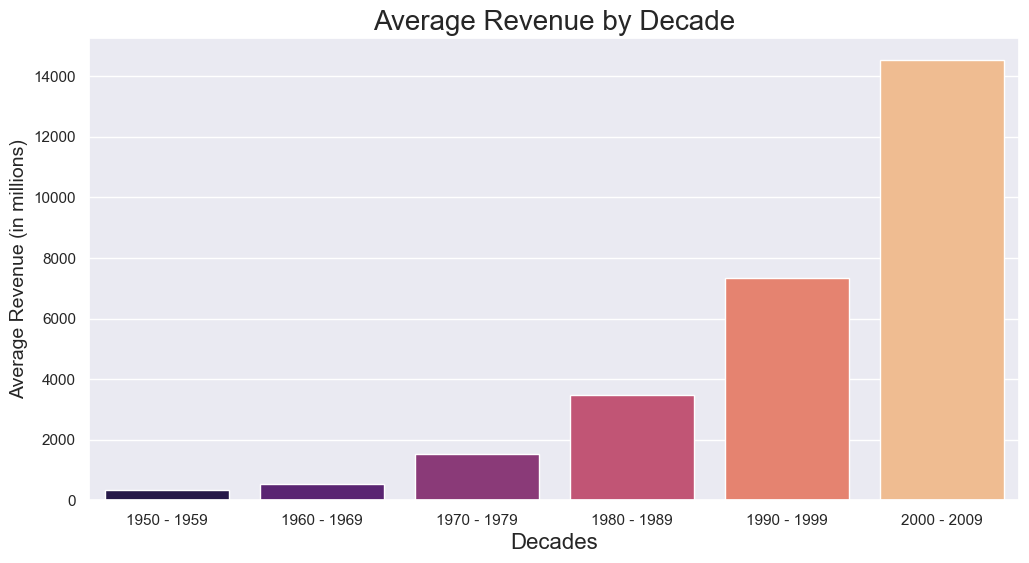

In [35]:
# Bar Plot

# https://seaborn.pydata.org/generated/seaborn.barplot.html
# https://seaborn.pydata.org/tutorial/color_palettes.html

# Revenue grouped by Average
average_revenue = df.groupby('Decade')['Revenue (in millions)'].mean()

plt.figure(figsize=(12, 6))
# plt.grid(axis='x', linestyle='--', alpha=0.1)

sns.barplot(x=average_revenue.index, y=average_revenue, palette='magma')

plt.title('Average Revenue by Decade',fontsize=20)
plt.xlabel('Decades',fontsize=16)
plt.ylabel('Average Revenue (in millions)',fontsize=14)

plt.show()

In [36]:
# Revenue figures by Decade
average_revenue = df.groupby('Decade')['Revenue (in millions)'].mean().reset_index()
average_revenue

,Decade,Revenue (in millions)
0,1950 - 1959,335.05
1,1960 - 1969,549.36
2,1970 - 1979,1522.21
3,1980 - 1989,3483.96
4,1990 - 1999,7351.90
5,2000 - 2009,14531.71
